In [0]:
import ee

In [2]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=wcaIupyKOiWrWxC7dh8rDF4mXYTFScFlp6rWSJIJva0&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/zQHZz4xiGxT49FlKuIFHUu7m_tPvL2KZOp-vKMgVBEEeL7AT3pA1qzY

Successfully saved authorization token.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
geometry = ee.FeatureCollection("TIGER/2010/Blocks")


# print("Initial Count:", geometry.size().getInfo())
test = geometry.limit(10).getInfo()['features']

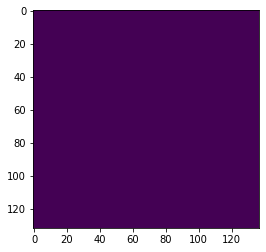

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# geometry[0]
# # Define an image.
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B4', 'B5', 'B6'])

# # Define an area of interest.
aoi = test[0]['geometry']
img = img.clip(aoi)
# # Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = img.sampleRectangle(region=aoi, defaultValue=0.0)

# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')
np_arr_b4 = np.array(band_arr_b4.getInfo())
np_arr_b5 = np.array(band_arr_b5.getInfo())
np_arr_b6 = np.array(band_arr_b6.getInfo())
plt.imshow(np_arr_b4)
# plt.imshow(np_arr_b5)
# plt.imshow(np_arr_b6)

In [25]:
img = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318').select(['B4','B3','B2']);
landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")

for i in range(10):
  aoi = test[i]['geometry']
  feature = ee.Feature(test[0]);
  landsat_AOI = landsat.filterBounds(Ituna_AOI)
  least_cloudy = ee.Image(landsat_AOI.sort('CLOUD_COVER').first())
  ee.batch.Export.image.toDrive(
    fileNamePrefix=str(0),
    region=feature.geometry().bounds().getInfo()['coordinates'],
    image=least_cloudy,
    description='test'+str(i),
    folder='geoexport',
    scale=30
    ).start()

AttributeError: ignored

In [0]:
from IPython.display import Image

# # Display a thumbnail of global elevation.
# landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")
# # for i in range(10):
# Ituna_AOI = 
# landsat_AOI = landsat.filterBounds(Ituna_AOI)
# least_cloudy = ee.Image(landsat_AOI.sort('CLOUD_COVER').first())
# least_cloudy = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318').clip(Ituna_AOI)
# least_cloudy = ee.Image(landsat_AOI.sort('CLOUD_COVER').first())


boundary = ee.Feature(test[0]).geometry().bounds().getInfo()['coordinates']

image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318').select(['B4','B3','B2']);
task_config = {'min': 0,
              'max': 1000,
              'dimensions': 128,
               'scale': 30,
              'bands': ['B4', 'B3', 'B2'],
              'region': boundary}
task = ee.batch.Export.image.toDrive(image, str('image'), **task_config)
task.start()
# parameters['region'] = 
# print(image.getThumbUrl(parameters))
# Image(url = least_cloudy.getThumbUrl(parameters))


EEException: ignored

In [6]:
from IPython.display import Image

# Display a thumbnail of global elevation.
landsat = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")
# for i in range(10):
aoi = test[0]['geometry']
landsat_AOI = landsat.filterBounds(aoi)
least_cloudy = ee.Image(landsat_AOI.sort('CLOUD_COVER').first()).clip(aoi)
parameters = {'min': 0,
              'max': 1000,
              'dimensions': 128,
              'bands': ['B4', 'B3', 'B2'],
              'region': aoi}
# parameters['region'] = 
Image(url = least_cloudy.getThumbUrl(parameters))
print(least_cloudy.getThumbUrl(parameters))

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/159b7b3f46617a744aa1cfdf54339bc0-f9751f11d2c1607a629591356f1a7e78:getPixels


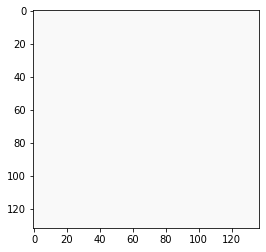